In [57]:
# Hämta MNIST datan
import numpy as np
from sklearn.datasets import fetch_openml

In [58]:
mnist = fetch_openml("mnist_784", version = 1, cache= True, as_frame= False)
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [59]:
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

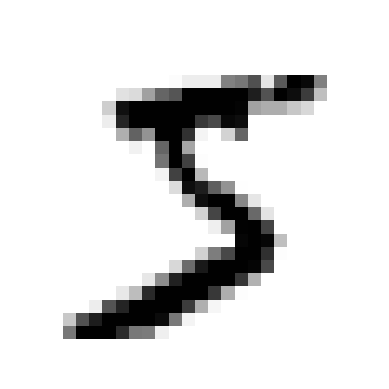

In [60]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
# Dela upp det i train, val, test eller kanske inte koden har ej körts med är ett alternativ
# X_train = X[:10000]
# y_train = y[:10000]
# X_val = X[10000:12500]
# y_val = y[10000:12500]

# X_test = X[12500:15000]
# y_test = y[12500:15000]

In [61]:
# importera saker som kan tänkas behövas och för mycket saker men spelar väl ingen roll
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Importera för standardisera och kolla accuracy score och alla andra scores
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

# Importera mina modeller 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Andra saker 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Vi kör med Kfold 
from sklearn.model_selection import KFold, train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate 



In [50]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import joblib


In [ ]:
# Kanske köra med crossvalidation eller med valideringsset? 
# Vilka modeller kan jag köra och hur många ska jag välja?
# 3 Olika modeller låter som en bra idé. Vilka isåfall?  
# SVM - Vilken? blir SVC och testar vilken kernel som fungerar bäst  
# Random forest 
# Decision trees / extra trees
# K-nearest neighbor
# Logistic Regression multinomial?

# Vi kör på Logistic Regression, SVC och Random forest.


In [ ]:
# Hur ska vi mäta hur bra dom presterar?
# Accuracy, Precision/recall, F1
# Confusion matrix är bra för visualiseringar

# Hittade classification report så kör med den


In [89]:
# Splitta datan, använder 10k så det går snabbare
X_train, X_test, y_train, y_test = train_test_split(X[:10000], y[:10000], test_size=0.2, random_state=42)



In [90]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(8000, 784)
(2000, 784)
(2000,)
(8000,)


In [13]:
# Funktion för confusion matrix
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

In [14]:
# Vi har redan lärt oss att första siffran är 5 så kika om det stämmer
y[0]

5

In [29]:
# Kolla lite på datan som finns

# len(X_train)
# len(y_train) samma längd inget konstigt


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [17]:
# Använd en custom scorer för att enklare kunna utvärdera våra modeller
# Hittade classification_scorer så detta behövs ej längre...
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score, average='macro'),
                 'recall': make_scorer(recall_score, average='macro'),
                 'f1': make_scorer(f1_score, average='macro')}

In [44]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)

# Params att testa 
param_grid = {
    'max_iter': [1000, 1500, 5000, 10000],  # iterationer
    'C': [0.01, 0.1, 1.0, 10.0]     # c-värden
}
# Skapa gridsearch
grid_log_reg = GridSearchCV(log_reg, param_grid, cv=5, scoring="accuracy")
grid_log_reg.fit(X_train, y_train)

# Hitta de bästa parametrarna
best_params_log = grid_log_reg.best_params_
print("Bästa parametrar:", best_params_log)


Bästa parametrar: {'C': 0.01, 'max_iter': 1000}


In [72]:
best_log_reg = grid_log_reg.best_estimator_

# träna med cross_val på bästa parametrarna för att kunna se hur den presterar
y_pred_log = cross_val_predict(best_log_reg, X_train, y_train, cv=5)

# Skriva ut min rapport
report_pred_log = classification_report(y_train, y_pred_log)
print("Classification Report Logistic Regression:")
print(report_pred_log)

Classification Report Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       794
           1       0.92      0.96      0.94       911
           2       0.84      0.81      0.82       787
           3       0.85      0.84      0.84       840
           4       0.87      0.87      0.87       769
           5       0.81      0.81      0.81       687
           6       0.90      0.93      0.92       794
           7       0.89      0.88      0.89       854
           8       0.81      0.78      0.79       778
           9       0.83      0.85      0.84       786

    accuracy                           0.87      8000
   macro avg       0.87      0.87      0.87      8000
weighted avg       0.87      0.87      0.87      8000



In [ ]:
# Bästa params första försök
'max_iter': [1000, 5000, 10000],
'C': [0.01, 0.1, 1.0, 10.0] 

# Bästa värden C 0.01 och Max iter 1000.
# Vi kör en gång till och ändrar olika iter fast håller C på 0.01
# Max iter 100 funkar ej testar på 1000 igen och ser om det funkar och då får vi köra med de.
# Max iter 1000 verkar va det som funkar så vi kör på 0.01 och max iter 1000

Bästa parametrar: {'C': 0.01, 'max_iter': 100}
testar att köra på 0.01 och 100? fast det funkar ej. 

param_grid = {
    'max_iter': [100, 500, 750, 1000, 1250],  
    'C': [0.01]    

In [45]:
# Resultated vi får från Logistic Regression är nu på 0.87. Nöjer oss där 

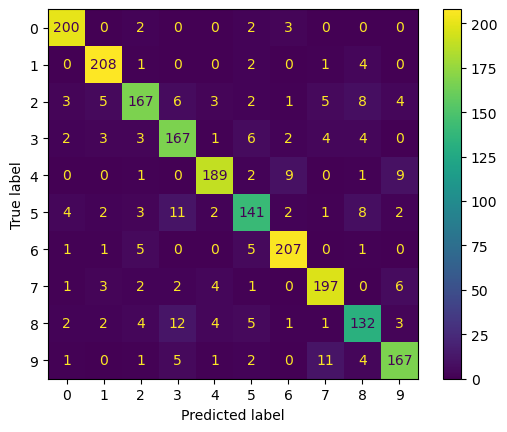

In [51]:

conf_mat = confusion_matrix(y_test, y_pred)


display_confusion_matrix(y_test, y_pred)


In [21]:
# Kolla på SVC  

# Standardisera data för SVC
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [22]:
""" ville ej fungera som jag ville gav upp och gjorde om 
# min model och pipeline 
rbf_svc_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
 ])

# Mina parametrar
param_grid = {
    "svm_clf__gamma": [0.1, 1, 10], 
    "svm_clf__C": [0.1, 1, 10]        
}

# leta efter bästa params
grid_search = GridSearchCV(rbf_svc_clf, param_grid, cv=5, scoring="accuracy")

# Utför grid search på träningsdata
grid_search.fit(X_train, y_train)

# Hitta de bästa parametrarna
best_params = grid_search.best_params_
print("Bästa parametrar:", best_params)

# Träna modellen med de bästa parametrarna på hela träningsuppsättningen
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

"""


Bästa parametrar: {'svm_clf__C': 10, 'svm_clf__gamma': 0.1}


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=10, gamma=0.1))])

In [37]:
"""  skitkod


y_pred_svc = best_model.predict(X_test)

# skapa och skriv ut classification report
report = classification_report(y_test, y_pred_svc)

print("Classification Report:")
print(report)
"""

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       207
           1       1.00      0.67      0.80       216
           2       0.00      0.00      0.00       204
           3       0.00      0.00      0.00       192
           4       0.00      0.00      0.00       211
           5       0.00      0.00      0.00       176
           6       0.00      0.00      0.00       220
           7       0.12      1.00      0.21       216
           8       0.00      0.00      0.00       166
           9       0.00      0.00      0.00       192

    accuracy                           0.18      2000
   macro avg       0.11      0.17      0.10      2000
weighted avg       0.12      0.18      0.11      2000



c:\Users\sebbe\anaconda3\envs\pystat\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sebbe\anaconda3\envs\pystat\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sebbe\anaconda3\envs\pystat\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import joblib

In [64]:
# SPARA MIN MODELL
joblib.dump(best_model, 'best_svc_model.joblib')
    

['best_svc_model.joblib']

In [36]:
# För att hämta den 
ladda_svc = joblib.load('best_svc_model.joblib')


In [ ]:

# ladda in min modell igen 
loaded_svc_model = load('svc_model.joblib')

# Nu kan du använda loaded_svc_model för att göra förutsägelser


In [ ]:
# Får otroligt dåliga resultat på denna vilket är typ för många timmar wastade. Börjar om från början och gör rätt!

In [52]:
# använder pipeline
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC())
])

# Olika parametrar Antonios förslag säger att dessa va bra att testa så vi börjar med dom
param_grid = {
    "svc__kernel": ["linear", "rbf", "poly"],
    "svc__gamma": [1, 2],
    "svc__C": [0.5, 1, 1.5]
}

# Hitta bästa parametrarna 
svm_grid = GridSearchCV(svm_clf, param_grid, cv=5, scoring="accuracy")

svm_grid.fit(X_train, y_train)

best_params = svm_grid.best_params_
print("Bäst parametrar:", best_params)


Bäst parametrar: {'svc__C': 0.5, 'svc__gamma': 1, 'svc__kernel': 'poly'}


In [ ]:
#Bäst parametrar: {'svc__C': 0.5, 'svc__gamma': 1, 'svc__kernel': 'poly'}

In [53]:
# Träna modellen med de bästa parametrarna på hela träningsuppsättningen
best_model_svm = svm_grid.best_estimator_
best_model_svm.fit(X_train, y_train)



Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=0.5, gamma=1, kernel='poly'))])

In [70]:
svm_grid = GridSearchCV(svm_clf, param_grid, cv=5, scoring="accuracy")

# testa hur modellen fungerar med cross_val_predict så vi vet vilket modell vi ska gå vidare med
y_pred_svm = cross_val_predict(best_model_svm, X_train, y_train, cv=5)

# Skriv ut classification report för träningsdatan
print("Classification Report SVM:")
print(classification_report(y_train, y_pred_svm))


Classification Report SVM:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       794
           1       0.98      0.98      0.98       911
           2       0.93      0.93      0.93       787
           3       0.95      0.93      0.94       840
           4       0.92      0.97      0.94       769
           5       0.96      0.94      0.95       687
           6       0.98      0.96      0.97       794
           7       0.95      0.94      0.95       854
           8       0.91      0.95      0.93       778
           9       0.93      0.92      0.93       786

    accuracy                           0.95      8000
   macro avg       0.95      0.95      0.95      8000
weighted avg       0.95      0.95      0.95      8000



In [ ]:
# Min nuvarande SVM modell gör ett mycket bättre jobb med arerage på 0.95%


In [ ]:
"""  Första testparametrarna
param_rfc = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2"], 
}
"""

In [77]:
# Skapa en RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Params att testa för grid search
param_rfc = {
    "n_estimators": [500, 750, 1000],
    "max_depth": [None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2"], 
} 

# Gridsearch för att hitta bästa params
grid_search_rfc = GridSearchCV(rfc, param_rfc, cv=5, scoring='accuracy')
grid_search_rfc.fit(X_train, y_train)

# Hitta de bästa parametrarna
best_params_rfc = grid_search_rfc.best_params_
print("Bästa parametrar:", best_params_rfc)


c:\Users\sebbe\anaconda3\envs\pystat\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
105 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sebbe\anaconda3\envs\pystat\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sebbe\anaconda3\envs\pystat\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\sebbe\anaconda3\envs\pystat\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
 

Bästa parametrar: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 750}


In [ ]:
# Bästa parametrar: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
# Borde testa högre n_estimators och lägre min_samples_leaf
# Testar nya 
# Fick error när jag testade nya men verkar som om 750 är bästa på n_estimators så testar på den 
#  The 'min_samples_leaf' parameter of RandomForestClassifier must be an int in the range [1, inf) or a float in the range (0.0, 1.0). Got 0 instead. fick ändå en etta så kör på den 


In [78]:

# Träna modellen med de bästa parametrarna och förutsägelser med korsvalidering
best_rfc = grid_search_rfc.best_estimator_
y_pred_rfc = cross_val_predict(best_rfc, X_train, y_train, cv=5)



In [79]:
# Skriv ut rapport
report_rfc = classification_report(y_train, y_pred_rfc)
print("Classification Report Random Forest:")
print(report_rfc)


Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       794
           1       0.96      0.98      0.97       911
           2       0.94      0.94      0.94       787
           3       0.95      0.92      0.93       840
           4       0.95      0.94      0.95       769
           5       0.96      0.93      0.95       687
           6       0.95      0.98      0.96       794
           7       0.97      0.95      0.96       854
           8       0.95      0.91      0.93       778
           9       0.90      0.94      0.92       786

    accuracy                           0.95      8000
   macro avg       0.95      0.95      0.95      8000
weighted avg       0.95      0.95      0.95      8000



In [ ]:
"""Om vi jämför mellan Random Forest och SVM så har dom samma precision, recall, F1-score och accuracy. 
När vi kikar närmare på siffrorna så ser vi att Random Forest har dom lägsta resultatet med 0.90 på 9or medans lägsta resultatet för SVM är 0.91 på 8or. 
Så med tanke på att lägsta resultatet är från Random Forest så har jag valt att fortsätta utvärdera SVM. 
"""

In [ ]:
# Fortsätta tweaka SVM 

#Bäst parametrar: {'svc__C': 0.5, 'svc__gamma': 1, 'svc__kernel': 'poly'}

In [83]:
# Testa pipeline? 
svm_clf_tweaked = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC())
])

# Testa nya parametrar för att hitta bästa 
param_grid_tweaked = {
    "svc__kernel": ["poly"],
    "svc__gamma": [1],
    "svc__C": [0.5]
}

# # Hitta bästa parametrarna 
svm_grid_tweaked = GridSearchCV(svm_clf, param_grid, cv=5, scoring="accuracy")

svm_grid_tweaked.fit(X_train, y_train)

best_params_tweaked = svm_grid_tweaked.best_params_
print("Bäst parametrar:", best_params_tweaked)




Bäst parametrar: {'svc__C': 0.5, 'svc__gamma': 1, 'svc__kernel': 'poly'}


In [84]:
# Fick samma resultat på bästa parametrar efter jag tweakat så behåller dessa och testar på testdatan
# Glömde spara modellen så tar enbart med hyperparametrarna som va dom bästa 
# Glömde spara vilka andra parametrar jag testade men gick åt det hållet som dom sa va bästa parametrarna

In [86]:
# Träna modellen med de bästa parametrarna på hela träningsuppsättningen
tweaked_model_svm = svm_grid_tweaked.best_estimator_
tweaked_model_svm.fit(X_train, y_train)



Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=0.5, gamma=1, kernel='poly'))])

In [87]:
# Testa nu hur modellen fungerar på testdatan dvs data den ej sett innan
test_pred = tweaked_model_svm.predict(X_test)


# Skriv ut classification report för träningsdatan
print("Classification Report SVM :")
print(classification_report(y_test, test_pred))


Classification Report SVM :
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       207
           1       0.98      1.00      0.99       216
           2       0.98      0.93      0.95       204
           3       0.92      0.93      0.93       192
           4       0.95      0.97      0.96       211
           5       0.95      0.91      0.93       176
           6       0.99      0.96      0.97       220
           7       0.95      0.95      0.95       216
           8       0.90      0.97      0.94       166
           9       0.95      0.92      0.94       192

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



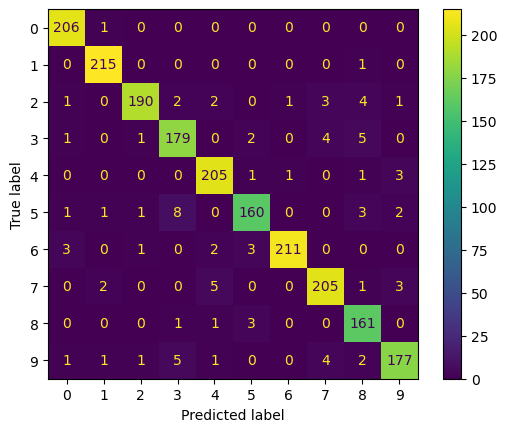

In [88]:

conf_mat = confusion_matrix(y_test, test_pred)


display_confusion_matrix(y_test, test_pred)
